# **ESERCIZI LEZIONE 3**

### ***1. CONSUMO DI ALCOL PER PAESE***

In [25]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

top10 = df.sort_values(by = 'total_litres_of_pure_alcohol', ascending = False).head(10)

media_birra = df["beer_servings"].mean()
media_vino = df["wine_servings"].mean()
media_distillati = df["spirit_servings"].mean()

df["alcohol_index"] = (df["beer_servings"]+df["wine_servings"]+df["spirit_servings"])/3
df["alcohol_index"].max()

231.66666666666666

In [26]:
df.sort_values(by = "beer_servings", ascending = False).head(100)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
117,Namibia,376,3,1,6.8,126.666667
45,Czech Republic,361,170,134,11.8,221.666667
62,Gabon,347,98,59,8.9,168.000000
65,Germany,346,117,175,11.3,212.666667
98,Lithuania,343,244,56,12.9,214.333333
...,...,...,...,...,...,...
39,Congo,76,1,9,1.7,28.666667
21,Bosnia-Herzegovina,76,173,8,4.6,85.666667
134,Philippines,71,186,1,4.6,86.000000
74,Honduras,69,98,2,3.0,56.333333


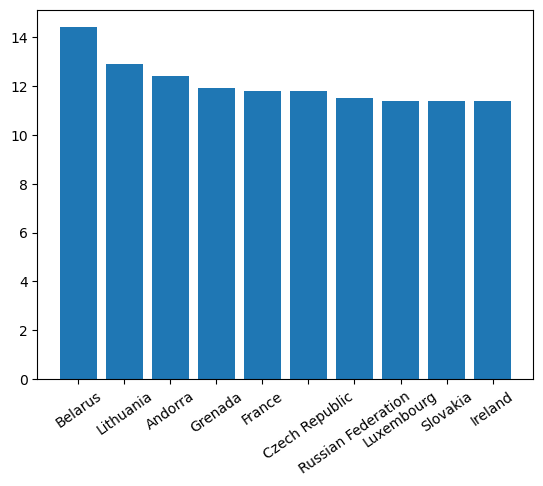

In [37]:
import matplotlib.pyplot as plt

plt.bar(top10['country'], top10['total_litres_of_pure_alcohol'])
plt.xticks(rotation=35)
plt.show()

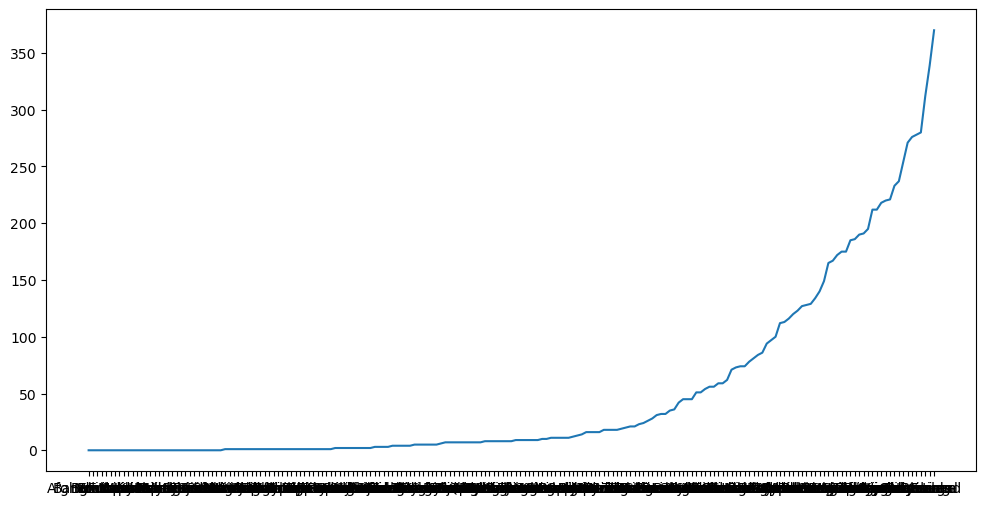

In [38]:
df_sorted_wine = df.sort_values(by='wine_servings')
plt.figure(figsize=(12,6))
plt.plot(df_sorted_wine['country'], df_sorted_wine['wine_servings'])
plt.show()

### ***2. ANALISI OFFERTE DI LAVORO***

In [48]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

salary = df.groupby("job_country")["salary_year_avg"].mean()
print(salary)

job_country
Afghanistan              NaN
Albania         79472.500000
Algeria         44550.000000
Angola                   NaN
Argentina      105212.343750
                   ...      
Venezuela                NaN
Vietnam         90927.236364
Yemen                    NaN
Zambia          90670.000000
Zimbabwe        67056.666667
Name: salary_year_avg, Length: 160, dtype: float64


In [49]:
job_count = df['job_country'].value_counts()
print(job_count)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
                   ...  
Guinea                 4
Lesotho                3
Mauritania             3
Bhutan                 3
Maldives               2
Name: count, Length: 160, dtype: int64


In [51]:
salary_min = df.groupby('job_country')['salary_year_avg'].min()
print(salary_min)
salary_max = df.groupby('job_country')['salary_year_avg'].max()
print(salary_max)

job_country
Afghanistan        NaN
Albania        43200.0
Algeria        44100.0
Angola             NaN
Argentina      45000.0
                ...   
Venezuela          NaN
Vietnam        28000.0
Yemen              NaN
Zambia         90670.0
Zimbabwe       47500.0
Name: salary_year_avg, Length: 160, dtype: float64
job_country
Afghanistan         NaN
Albania        157500.0
Algeria         45000.0
Angola              NaN
Argentina      222000.0
                 ...   
Venezuela           NaN
Vietnam        200000.0
Yemen               NaN
Zambia          90670.0
Zimbabwe        90670.0
Name: salary_year_avg, Length: 160, dtype: float64


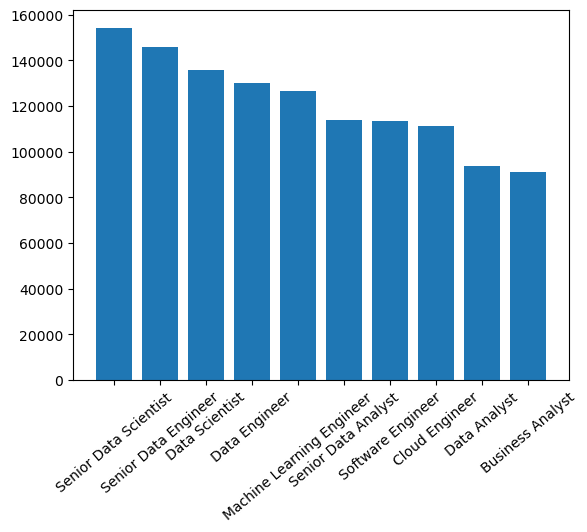

In [57]:
salary_by_title = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)

plt.bar(salary_by_title.index, salary_by_title.values)
plt.xticks(rotation = 40)
plt.show()